In [17]:
import numpy as np
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("placement.csv")

In [20]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\PRINCE AGRAWAL\AppData\Local\Temp\ipykernel_20504\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\PRINCE AGRAWAL\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PRINCE AGRAWAL\AppData\Local\Temp\ipykernel_20504\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

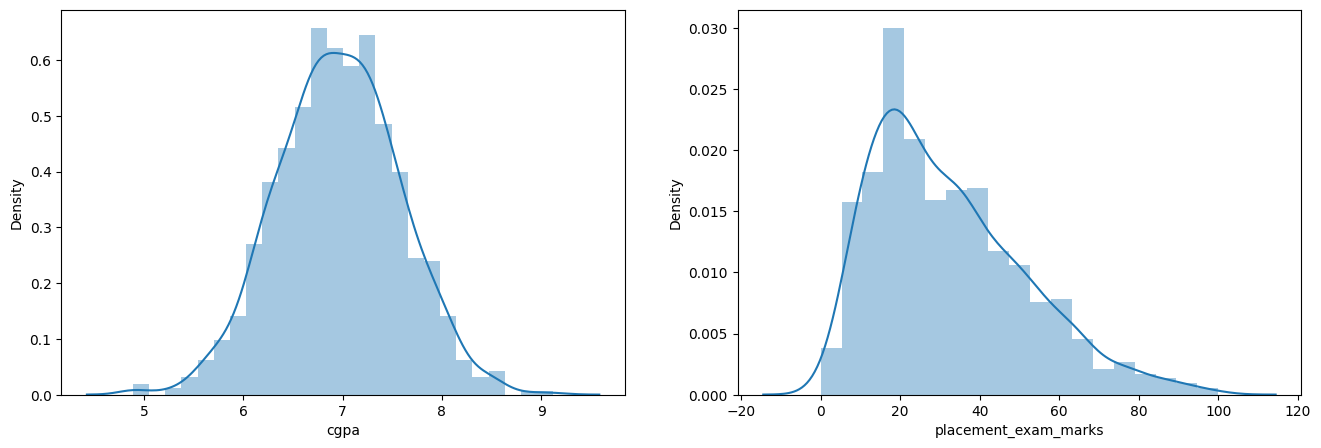

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

<Axes: >

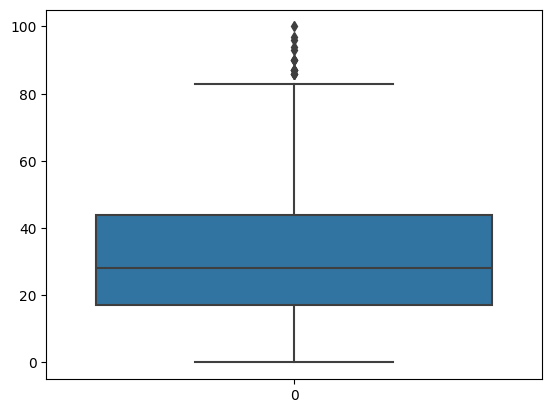

In [22]:
sns.boxplot(df['placement_exam_marks'])

In [23]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [24]:
q1=df['placement_exam_marks'].quantile(0.25)
q2=df['placement_exam_marks'].quantile(0.50)
q3=df['placement_exam_marks'].quantile(0.75)

iqr=q3-q1

maxi=q3+1.5*iqr
mini=q3-1.5*iqr

In [25]:
df['iqr_decision']=np.where(
    df['placement_exam_marks']>maxi,
    False,
    np.where(
        df['placement_exam_marks']<mini,
        False,
        True
    )
)

In [26]:
df

,cgpa,placement_exam_marks,placed,iqr_decision
0,7.19,26.0,1,True
1,7.46,38.0,1,True
2,7.54,40.0,1,True
3,6.42,8.0,1,True
4,7.23,17.0,0,True
...,...,...,...,...
995,8.87,44.0,1,True
996,9.12,65.0,1,True
997,4.89,34.0,0,True
998,8.62,46.0,1,True


In [28]:
df=df[df['iqr_decision']==True]

<Axes: >

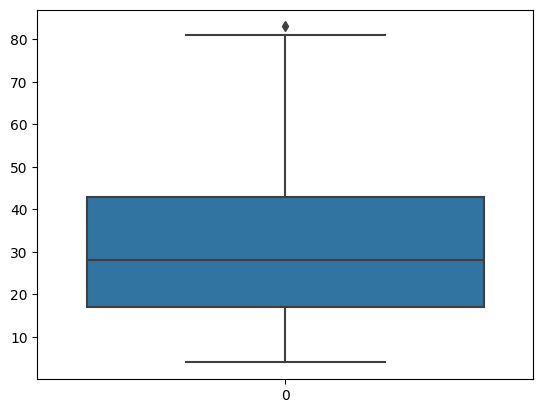

In [29]:
sns.boxplot(df['placement_exam_marks'])